import modules

In [15]:
import torch as t
from diffusion import diffuse
from diffusion_gumbel import diffuse_STE
from reaction import rho, p1, p2, p3, p4, p5, p6
from reaction_ste import rho_STE
from torch.distributions import uniform
from IPython.display import Image
from IPython import display
import matplotlib.pyplot as plt
import time
import numpy as np
from tqdm import tqdm

Run model with standard diffusion + standard reaction

In [10]:
grid = t.zeros((1,2,512,512))
grid[0] = 50
grid[0,0,251:261] = 90
N = 100 
gamma = 0.005 
rate_coefficients = t.tensor([0.98,0.98,0.1,0.1,0.2,0.2])
probability_funcs = [p1,p2,p3,p4,p5,p6]
num_steps = 10_000
DA = 0.1
DB = 0.4
t.sum(grid[0,0])

tensor(13312000.)

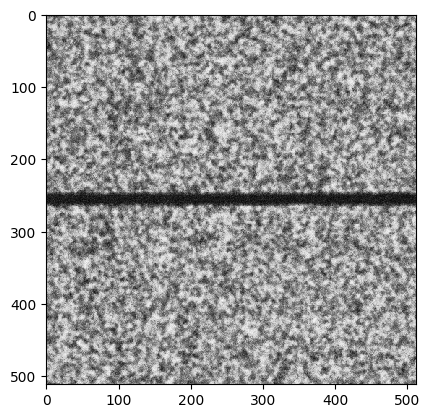

100%|██████████| 10000/10000 [06:00<00:00, 27.73it/s]


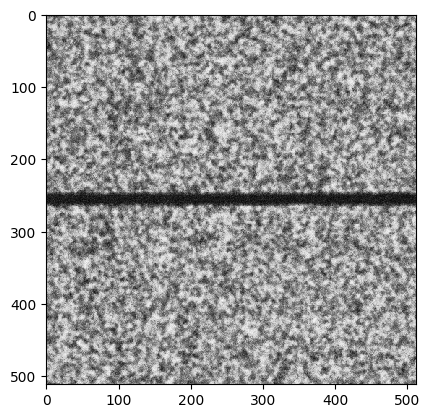

In [12]:
grid = grid.cuda().float()

for i in tqdm(range(num_steps)):
  if i % 100 == 0:
    display.clear_output(wait=True)
    plt.cla()
    plt.imshow(grid[0,0].cpu(), cmap="Greys", interpolation="nearest", vmin=0, vmax=100)
    display.display(plt.gcf())
    
    
  grid[0] = diffuse(grid[0], N, DA, DB)
  grid[0] = rho(grid[0], N, gamma, rate_coefficients, probability_funcs, num_reaction_channels=6)

Run model with differentiable diffusion + standard reaction

In [13]:
grid = t.zeros((1,2,512,512))
grid[0] = 50
grid[0,0,251:261] = 90
N = 100 
gamma = 0.005 
rate_coefficients = t.tensor([0.98,0.98,0.1,0.1,0.2,0.2])
probability_funcs = [p1,p2,p3,p4,p5,p6]
num_steps = 10_000
DA = t.tensor(0.1)
DB = t.tensor(0.4)
t.sum(grid[0,0])

tensor(13312000.)

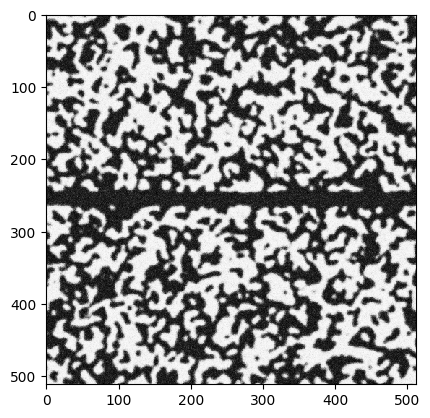

100%|██████████| 10000/10000 [06:53<00:00, 24.17it/s]


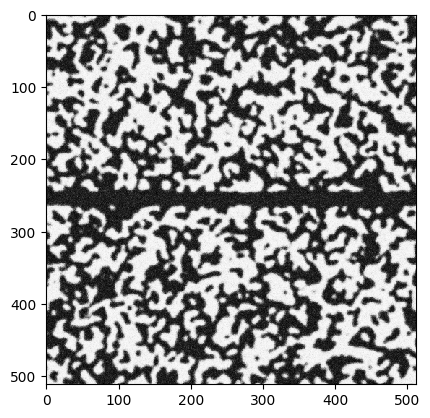

In [18]:
grid = grid.cuda().float()

for i in tqdm(range(num_steps)):
  if i % 100 == 0:
    display.clear_output(wait=True)
    plt.cla()
    plt.imshow(grid[0,0].cpu(), cmap="Greys", interpolation="nearest", vmin=0, vmax=100)
    display.display(plt.gcf())
    
    
  grid = diffuse_STE(grid, N, DA, DB)
  grid[0] = rho(grid[0], N, gamma, rate_coefficients, probability_funcs, num_reaction_channels=6)

Run model with standard diffusion + differentiable reaction

In [22]:
grid = t.zeros((1,2,512,512))
grid[0] = 50
grid[0,0,251:261] = 90
N = 100 
gamma = 0.005 
rate_coefficients = t.tensor([0.98,0.98,0.1,0.1,0.2,0.2])
probability_funcs = [p1,p2,p3,p4,p5,p6]
num_steps = 30_000
DA = 0.1
DB = 0.4
t.sum(grid[0,0])

tensor(13312000.)

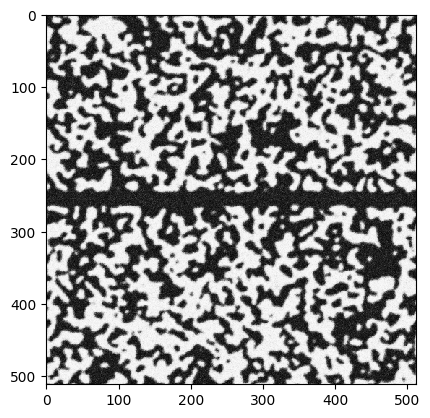

100%|██████████| 30000/30000 [20:06<00:00, 24.87it/s]


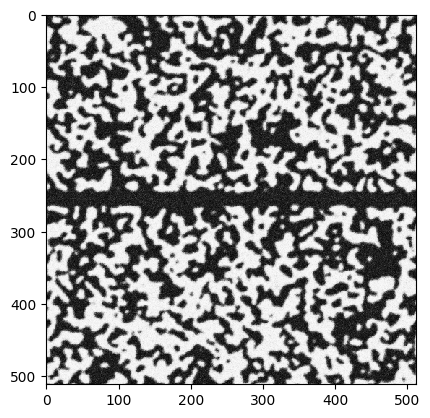

In [23]:
grid = grid.cuda().float()

for i in tqdm(range(num_steps)):
  if i % 100 == 0:
    display.clear_output(wait=True)
    plt.cla()
    plt.imshow(grid[0,0].cpu(), cmap="Greys", interpolation="nearest", vmin=0, vmax=100)
    display.display(plt.gcf())
    
    
  grid[0] = diffuse(grid[0], N, DA, DB)
  grid = rho_STE(grid, N, gamma, rate_coefficients, probability_funcs, num_reaction_channels=6)

Run model with differentiable diffusion + differentiable reaction

In [25]:
grid = t.zeros((1,2,512,512))
grid[0] = 50
grid[0,0,251:261] = 90
N = 100 
gamma = 0.005 
rate_coefficients = t.tensor([0.98,0.98,0.1,0.1,0.2,0.2])
probability_funcs = [p1,p2,p3,p4,p5,p6]
num_steps = 30_000
DA = t.tensor(0.1)
DB = t.tensor(0.4)
t.sum(grid[0,0])

tensor(13312000.)

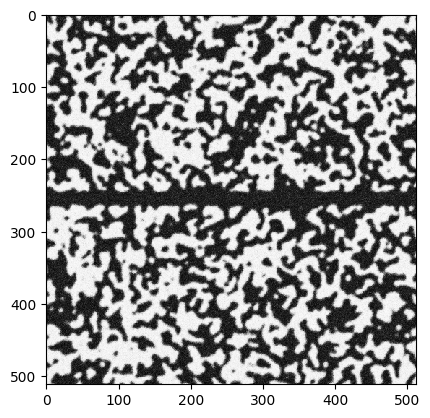

100%|██████████| 30000/30000 [15:11<00:00, 32.92it/s]


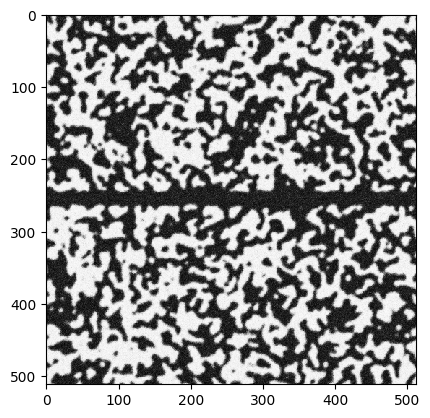

In [26]:
grid = grid.cuda().float()

for i in tqdm(range(num_steps)):
  if i % 100 == 0:
    display.clear_output(wait=True)
    plt.cla()
    plt.imshow(grid[0,0].cpu(), cmap="Greys", interpolation="nearest", vmin=0, vmax=100)
    display.display(plt.gcf())
    
    
  grid = diffuse_STE(grid, N, DA, DB)
  grid = rho_STE(grid, N, gamma, rate_coefficients, probability_funcs, num_reaction_channels=6)